# PAGAMENTO CARTÃO DE CRÉDITO (KNN)

## INTRODUÇÃO


O presente projeto tem como escopo construir um modelo de machine learning para prever a probabilidade de inadimplência no pagamento do cartão de crédito por clientes de um banco. O dataset possui 30000 linhas e 24 variáveis, possuindo a variável binária (*default payment next month*) que usamos como variável dependente. Essa variável indica o status de pagamento do cartão, ou seja, se ele foi ou não efetuado. Para tal, construímos cinco modelos de previsão, utilizando o algoritmo KNN.


Dados: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## 1. CARREGANDO PACOTES E IMPORTANDO OS DADOS

In [1]:
# Carregando os pacotes
library(ISLR)
library(caret)
library(e1071)
library(tidyverse)
library(Amelia)
library(DMwR)
library(gridExtra)

Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.4     
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x

In [2]:
# Carregar dados 
df_clientes<- read.csv("dataset.csv")

In [3]:
# Sumário dos dados
summary(df_clientes)

       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

In [4]:
# Visualizar as seis primeiras linhas do dataset
head(df_clientes)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [5]:
# Visualizar as seis úlitmas linhas do dataset
tail(df_clientes)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29995,80000,1,2,2,34,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
30000,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
# Checar NAs
sapply(df_clientes, function(x) sum(is.na(x)))

ID                  LIMIT_BAL 
                         0                          0 
                       SEX                  EDUCATION 
                         0                          0 
                  MARRIAGE                        AGE 
                         0                          0 
                     PAY_0                      PAY_2 
                         0                          0 
                     PAY_3                      PAY_4 
                         0                          0 
                     PAY_5                      PAY_6 
                         0                          0 
                 BILL_AMT1                  BILL_AMT2 
                         0                          0 
                 BILL_AMT3                  BILL_AMT4 
                         0                          0 
                 BILL_AMT5                  BILL_AMT6 
                         0                          0 
                  PAY_AMT1                   PAY_AMT2 
                         0                          0 
                  PAY_AMT3                   PAY_AMT4 
                         0                          0 
                  PAY_AMT5                   PAY_AMT6 
                         0                          0 
default.payment.next.month 
                         0

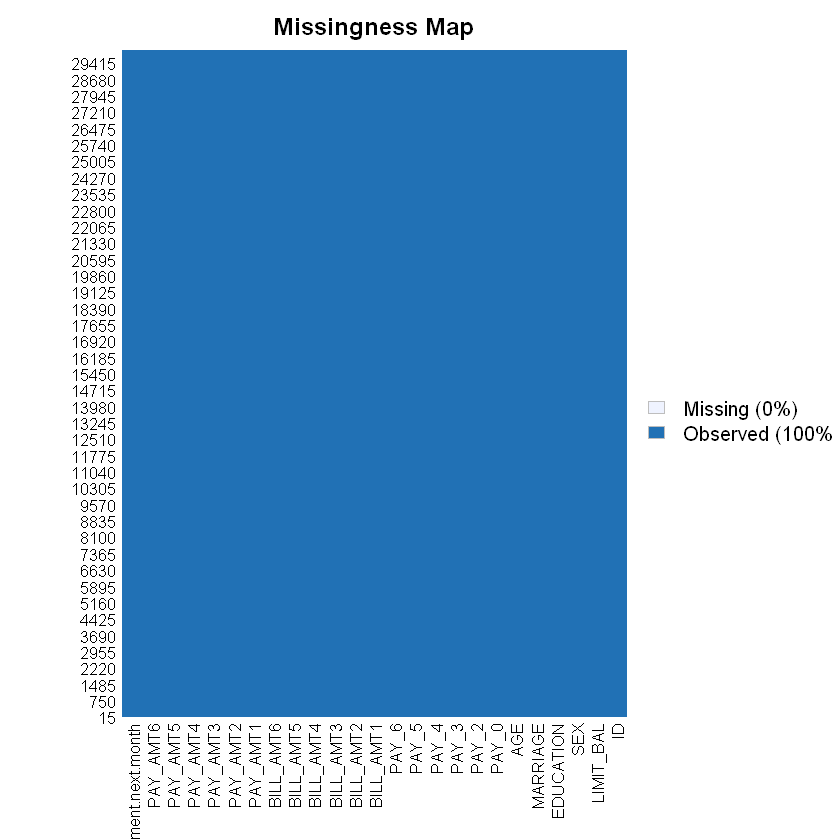

In [7]:
# Plotar NAs
missmap(df_clientes)

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

### 2.1 Pré Conversão

In [8]:
# Remover primeira coluna - ID
df_clientes<- df_clientes[,-1]

In [9]:
# Renomear a a variável dependente - DEFAULTING
colnames(df_clientes) [24]<- "DEFAULTING"

In [10]:
# Transformar variaveis 
df_clientes$SEX<- factor(df_clientes$SEX,
                         levels = c(1,2),
                         labels = c("Male","Female"))

df_clientes$MARRIAGE<- factor(df_clientes$MARRIAGE,
                              levels = c(0,1,2,3),
                              labels=c("Unknown","Married","Single","Others"))

df_clientes$EDUCATION<- factor(df_clientes$EDUCATION,
                               levels = c(1,2,3,4),
                               labels = c("Graduate School", "University",
                                          "High School","Others"))
df_clientes$PAY_0<- factor(df_clientes$PAY_0)
df_clientes$PAY_2<- factor(df_clientes$PAY_2)
df_clientes$PAY_3<- factor(df_clientes$PAY_3)
df_clientes$PAY_4<- factor(df_clientes$PAY_4)
df_clientes$PAY_5<- factor(df_clientes$PAY_5)
df_clientes$PAY_6<- factor(df_clientes$PAY_6)
df_clientes$DEFAULTING<- factor(df_clientes$DEFAULTING,levels=c(0,1),labels=c("Yes","No"))

### 2.2 Pós Conversão

In [11]:
# Visualizando dados pós conversão
glimpse(df_clientes)

Rows: 30,000
Columns: 24
$ LIMIT_BAL  <int> 20000, 120000, 90000, 50000, 50000, 50000, 500000, 100000, ~
$ SEX        <fct> Female, Female, Female, Female, Male, Male, Male, Female, F~
$ EDUCATION  <fct> University, University, University, University, University,~
$ MARRIAGE   <fct> Married, Single, Single, Married, Married, Single, Single, ~
$ AGE        <int> 24, 26, 34, 37, 57, 37, 29, 23, 28, 35, 34, 51, 41, 30, 29,~
$ PAY_0      <fct> 2, -1, 0, 0, -1, 0, 0, 0, 0, -2, 0, -1, -1, 1, 0, 1, 0, 0, ~
$ PAY_2      <fct> 2, 2, 0, 0, 0, 0, 0, -1, 0, -2, 0, -1, 0, 2, 0, 2, 0, 0, -2~
$ PAY_3      <fct> -1, 0, 0, 0, -1, 0, 0, -1, 2, -2, 2, -1, -1, 2, 0, 0, 2, 0,~
$ PAY_4      <fct> -1, 0, 0, 0, 0, 0, 0, 0, 0, -2, 0, -1, -1, 0, 0, 0, 2, -1, ~
$ PAY_5      <fct> -2, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, -1, -1, 0, 0, 0, 2, -1, ~
$ PAY_6      <fct> -2, 2, 0, 0, 0, 0, 0, -1, 0, -1, -1, 2, -1, 2, 0, 0, 2, -1,~
$ BILL_AMT1  <int> 3913, 2682, 29239, 46990, 8617, 64400, 367965, 11876, 11285~
$ BILL_AMT2  <i

In [12]:
# Checar NAs
sapply(df_clientes, function(x) sum(is.na(x)))

LIMIT_BAL        SEX  EDUCATION   MARRIAGE        AGE      PAY_0      PAY_2 
         0          0        345          0          0          0          0 
     PAY_3      PAY_4      PAY_5      PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3 
         0          0          0          0          0          0          0 
 BILL_AMT4  BILL_AMT5  BILL_AMT6   PAY_AMT1   PAY_AMT2   PAY_AMT3   PAY_AMT4 
         0          0          0          0          0          0          0 
  PAY_AMT5   PAY_AMT6 DEFAULTING 
         0          0          0

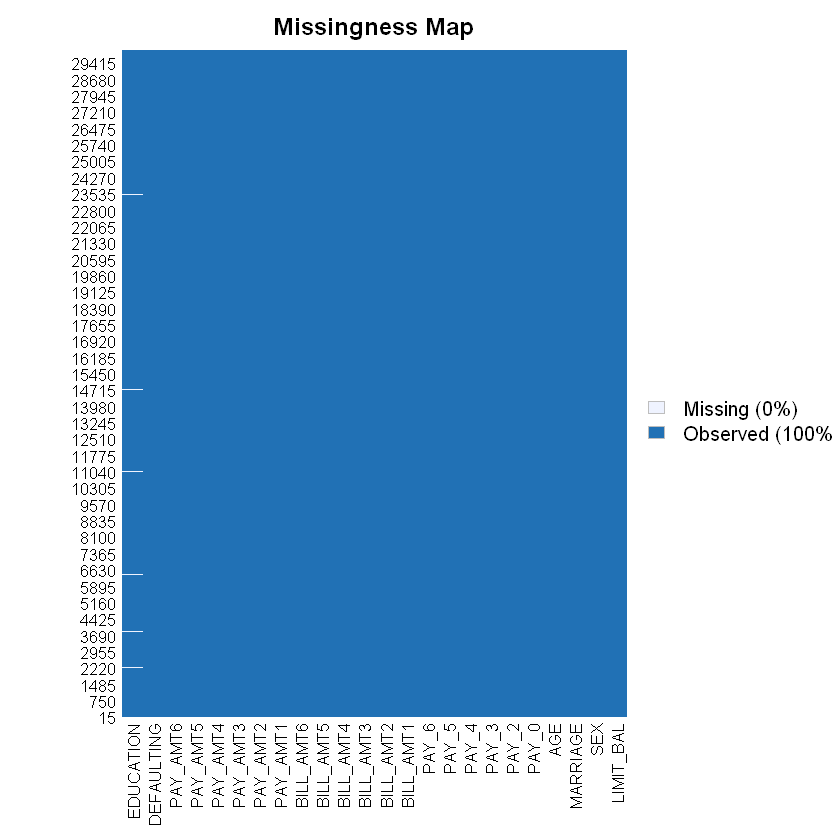

In [13]:
# Plot NAs
missmap(df_clientes)

In [14]:
# Omitir NAs
df_clientes<-na.omit(df_clientes)

### 2.3 Plotando as variáveis

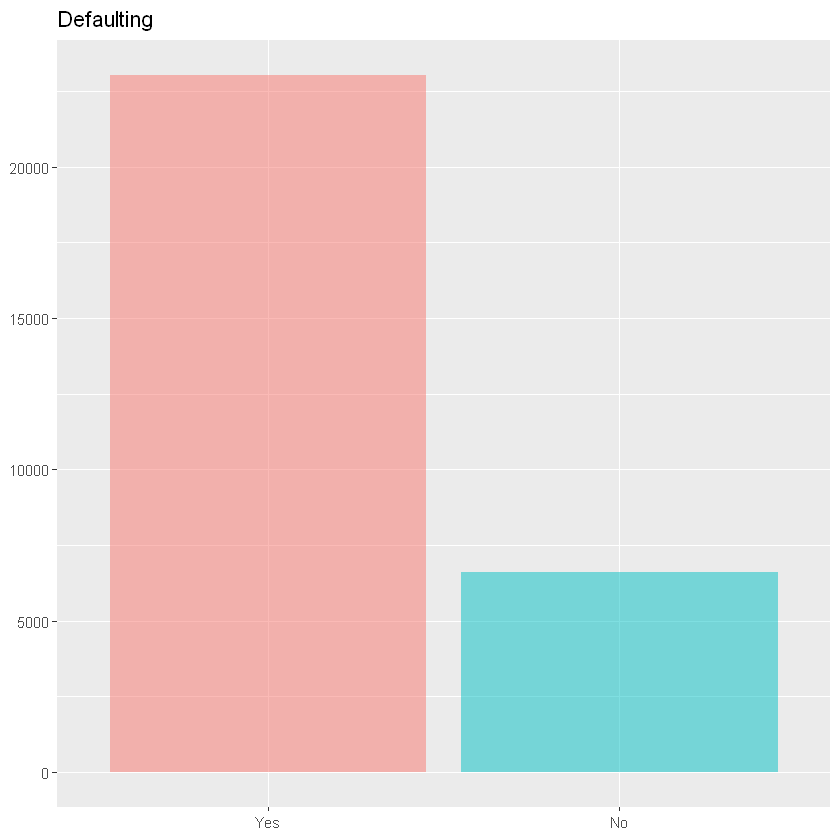

In [15]:
# Plotar variável dependente - Defaulting
df_clientes %>%
  ggplot(aes(DEFAULTING,fill=DEFAULTING)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Defaulting",x=NULL,y=NULL)

In [16]:
# Plotar variável Amount of the given credit
plot1<-df_clientes %>%
ggplot(aes(LIMIT_BAL)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of the Given Credit",x=NULL,y=NULL)

In [54]:
# Plotar variável Age
plot2<-df_clientes %>%
  ggplot(aes(AGE)) +
  geom_bar(colour="red",fill="lightblue",show.legend = F, alpha=.5) +
  labs(title = "Age",x=NULL,y=NULL)

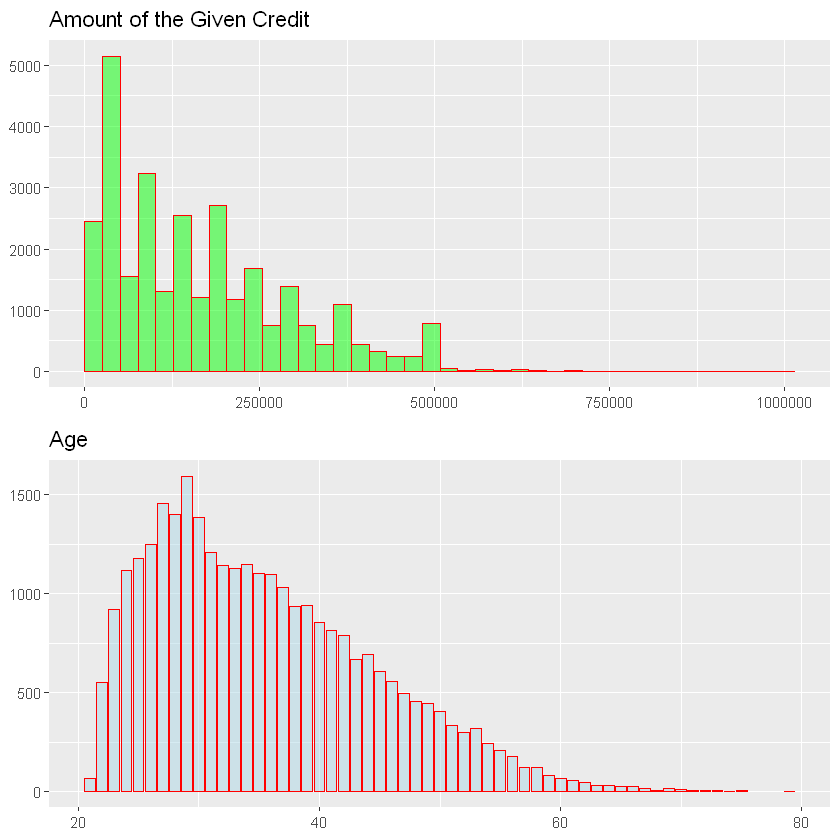

In [55]:
grid.arrange(plot1,plot2)

In [19]:
# Plot Marriage
plot3<-df_clientes %>%
ggplot(aes(MARRIAGE,fill=MARRIAGE)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Marriage Status",x=NULL,y=NULL)

In [20]:
# Plot Education
plot4<-df_clientes %>%
ggplot(aes(EDUCATION,fill=EDUCATION)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Education Level",x=NULL,y=NULL)

In [21]:
# Plot Sex
plot5<-df_clientes %>%
ggplot(aes(SEX,fill=SEX)) +
geom_bar(show.legend=F,alpha=.5) +
labs(title="Sex",x=NULL,y=NULL)

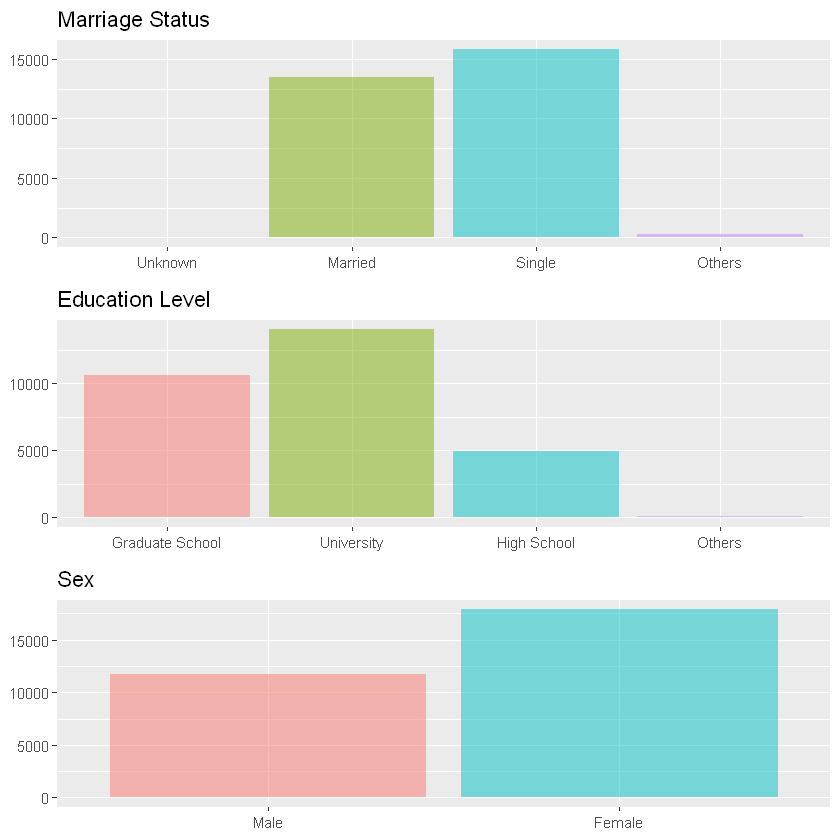

In [22]:
grid.arrange(plot3,plot4,plot5)

In [23]:
# Plotar variável Pay0
plot6<-df_clientes %>%
  ggplot(aes(PAY_0,fill=PAY_0)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay0",x=NULL,y=NULL)

In [24]:
# Plotar variável Pay2
plot7<-df_clientes %>%
  ggplot(aes(PAY_2,fill=PAY_2)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay2",x=NULL,y=NULL)

In [25]:
# Plotar variável Pay3
plot8<-df_clientes %>%
  ggplot(aes(PAY_3,fill=PAY_3)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay3",x=NULL,y=NULL)

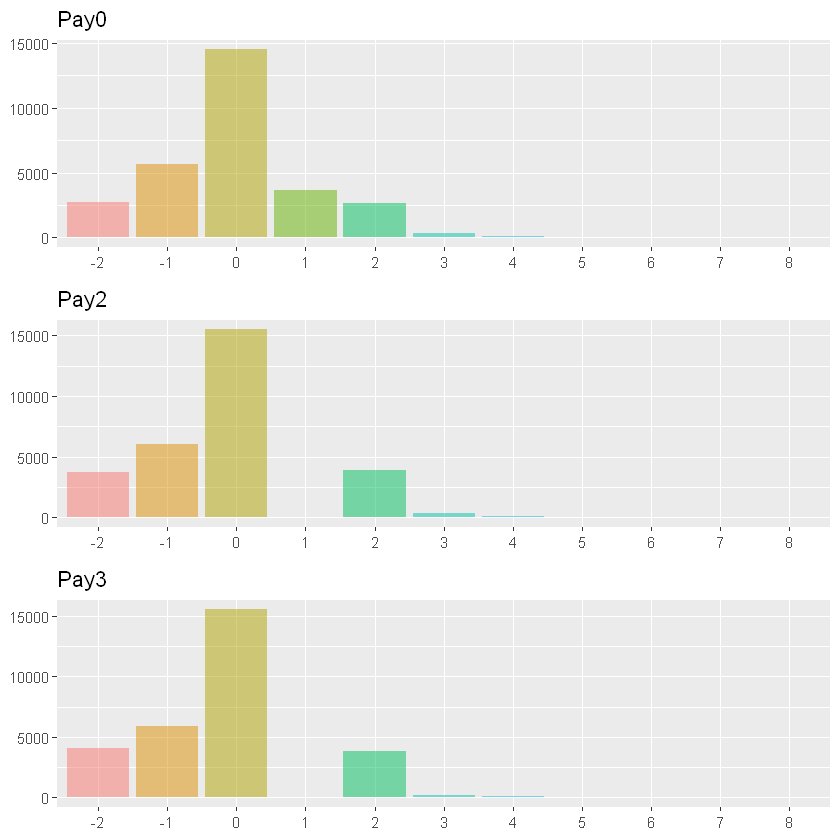

In [26]:
grid.arrange(plot6,plot7,plot8)

In [27]:
# Plotar variável Pay4
plot9<-df_clientes %>%
  ggplot(aes(PAY_4,fill=PAY_4)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay4",x=NULL,y=NULL)

In [28]:
# Plotar variável Pay5
plot10<-df_clientes %>%
  ggplot(aes(PAY_5,fill=PAY_5)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay5",x=NULL,y=NULL)

In [29]:
# Plotar variável Pay6
plot11<-df_clientes %>%
  ggplot(aes(PAY_6,fill=PAY_6)) +
  geom_bar(show.legend = F, alpha=.5) +
  labs(title = "Pay6",x=NULL,y=NULL)

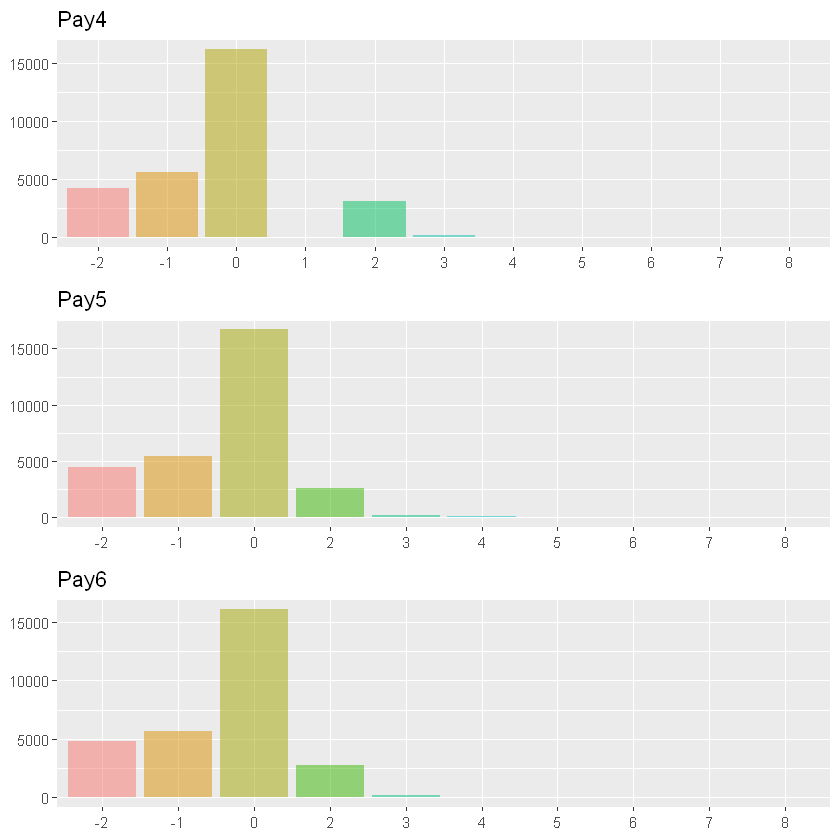

In [30]:
grid.arrange(plot9,plot10,plot11)

In [31]:
# Plotar variável Amount of Bill1
plot12<-df_clientes %>%
ggplot(aes(BILL_AMT1)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill1",x=NULL,y=NULL)

In [32]:
# Plotar variável Amount of Bill2
plot13<-df_clientes %>%
ggplot(aes(BILL_AMT2)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill2",x=NULL,y=NULL)

In [33]:
# Plotar variável Amount of Bill3
plot14<-df_clientes %>%
ggplot(aes(BILL_AMT3)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill3",x=NULL,y=NULL)

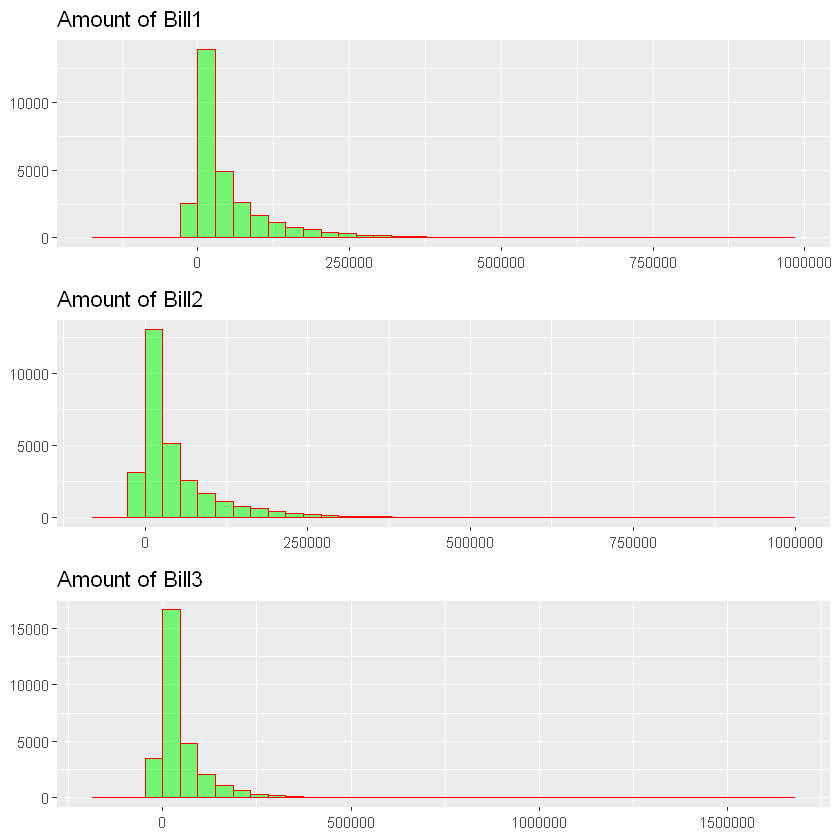

In [34]:
grid.arrange(plot12,plot13,plot14)

In [35]:
# Plotar variável Amount of Bill4
plot15<-df_clientes %>%
ggplot(aes(BILL_AMT4)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill4",x=NULL,y=NULL)

In [36]:
# Plotar variável Amount of Bill5
plot16<-df_clientes %>%
ggplot(aes(BILL_AMT5)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill5",x=NULL,y=NULL)

In [37]:
# Plotar variável Amount of Bill6
plot17<-df_clientes %>%
ggplot(aes(BILL_AMT6)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of Bill6",x=NULL,y=NULL)

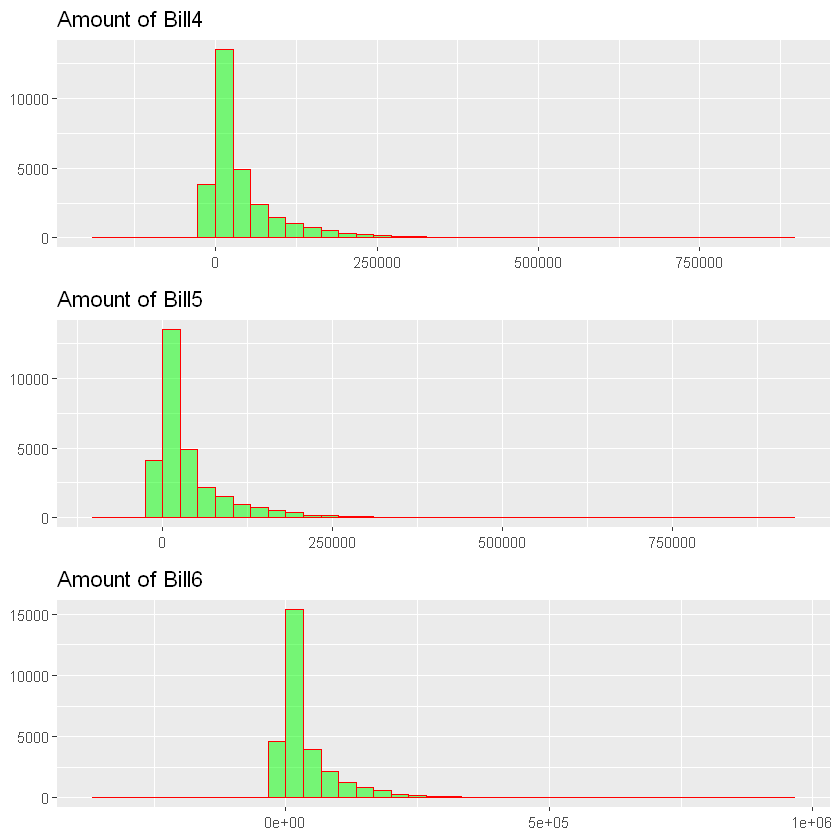

In [38]:
grid.arrange(plot15,plot16,plot17)

In [39]:
# Plotar variável  Amount of previous payment1
plot18<-df_clientes %>%
ggplot(aes(PAY_AMT1)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment1",x=NULL,y=NULL)

In [40]:
# Plotar variável  Amount of previous payment2
plot19<-df_clientes %>%
ggplot(aes(PAY_AMT2)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment2",x=NULL,y=NULL)

In [41]:
# Plotar variável  Amount of previous payment3
plot20<-df_clientes %>%
ggplot(aes(PAY_AMT3)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment3",x=NULL,y=NULL)

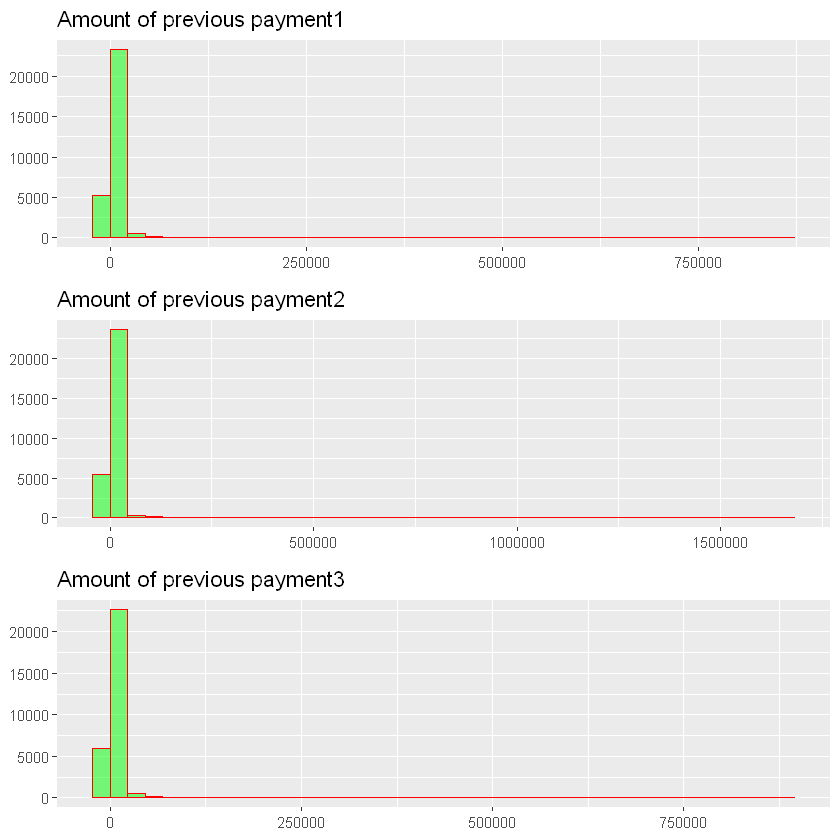

In [42]:
grid.arrange(plot18,plot19,plot20)

In [43]:
# Plotar variável  Amount of previous payment4
plot21<-df_clientes %>%
ggplot(aes(PAY_AMT4)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment4",x=NULL,y=NULL)

In [44]:
# Plotar variável  Amount of previous payment5
plot22<-df_clientes %>%
ggplot(aes(PAY_AMT5)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment5",x=NULL,y=NULL)

In [45]:
# Plotar variável  Amount of previous payment6
plot23<-df_clientes %>%
ggplot(aes(PAY_AMT6)) +
geom_histogram(fill = "green", color = "red", alpha = .5, bins = 40, boundary = 5) +
labs(title="Amount of previous payment6",x=NULL,y=NULL)

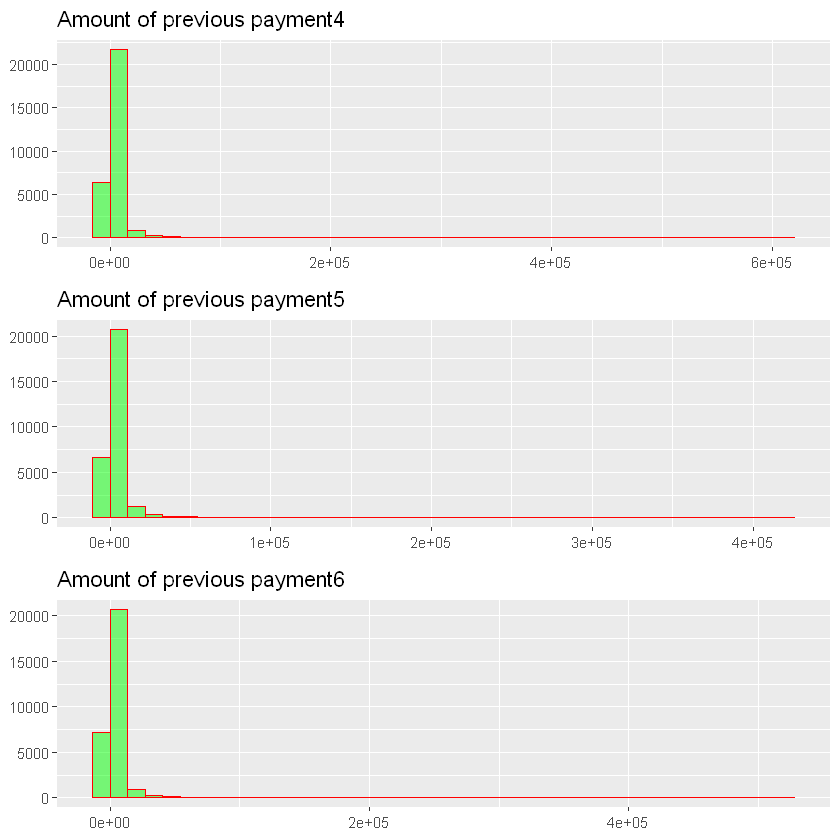

In [46]:
grid.arrange(plot21,plot22,plot23)

### 2.4 Relação entre variáveis

In [56]:
# Relação variável dependente e quantia de crédito concedido
plot24<-df_clientes %>%
  ggplot(aes(DEFAULTING,LIMIT_BAL,fill=DEFAULTING)) +
  geom_violin(alpha=.5,show.legend = F) +
  labs(title="Defaulting x Amount of the Given Credit",x=NULL,y=NULL)

In [57]:
# Relação variável dependente e idade
plot25<-df_clientes %>%
  ggplot(aes(DEFAULTING,AGE,fill=DEFAULTING)) +
  geom_violin(alpha=.5,show.legend = F) +
  labs(title="Defaulting x Age",x=NULL,y=NULL)

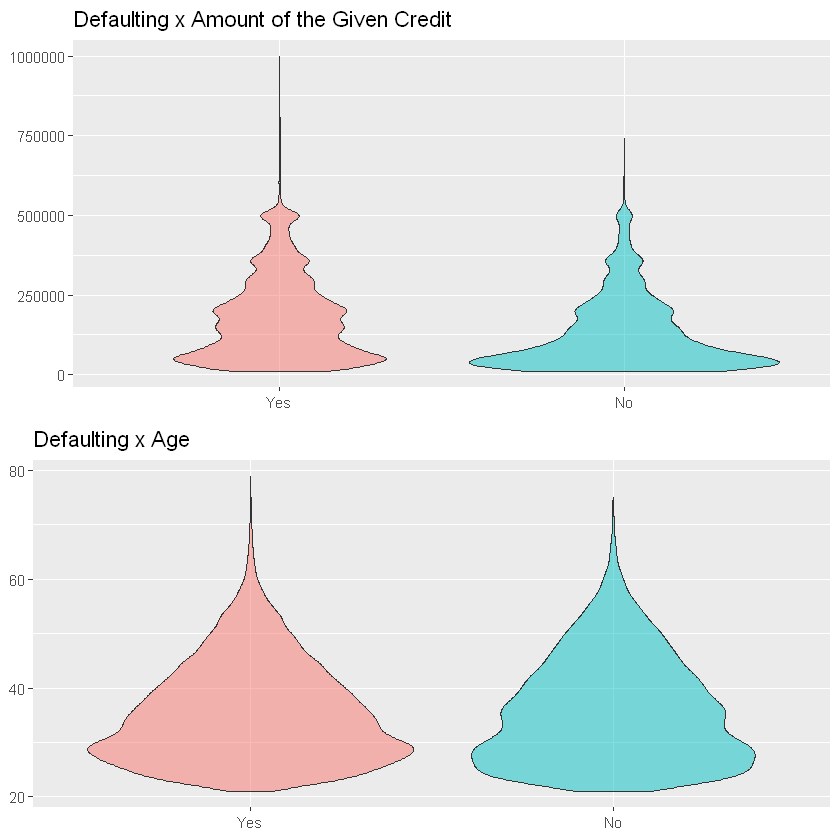

In [58]:
grid.arrange(plot24,plot25)

In [60]:
# # Relação variável dependente e estado civil
plot26<-df_clientes %>%
  ggplot(aes(DEFAULTING,LIMIT_BAL,fill=MARRIAGE)) +
  geom_violin(alpha=.5) +
  labs(title="Defaulting x Amount of the Given Credit per Marriage",x=NULL,y=NULL)

In [61]:
# Relação variável dependente, quantia de crédito concedido e sexo
plot27<-df_clientes %>%
  ggplot(aes(DEFAULTING,LIMIT_BAL,fill=SEX)) +
  geom_violin(alpha=.5,show.legend = F) +
  labs(title="Defaulting x Amount of the Given Credit per Sex",x=NULL,y=NULL)

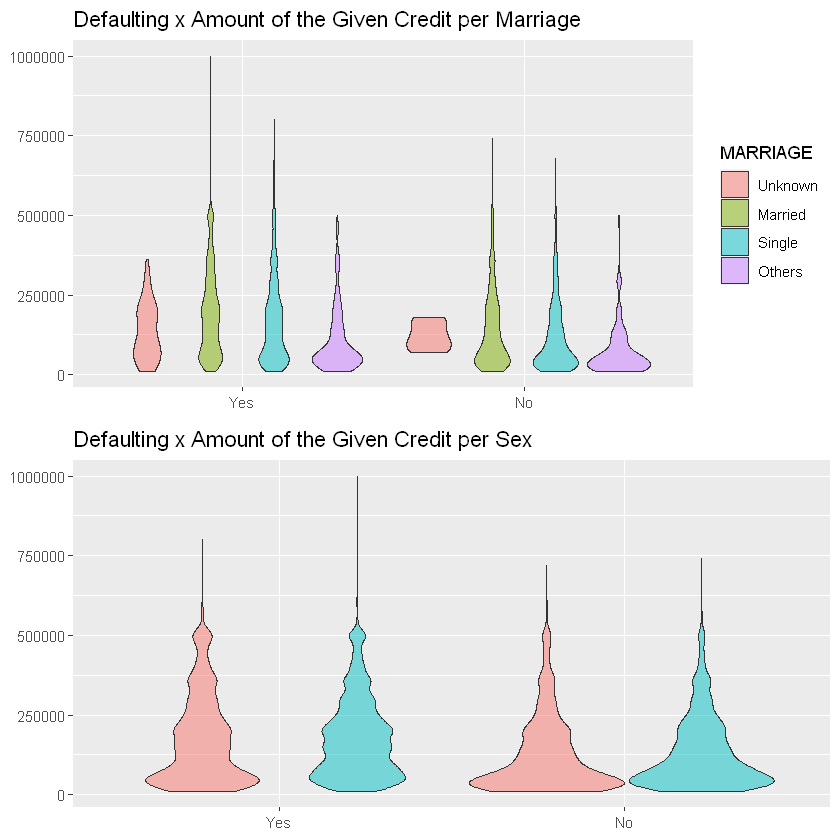

In [62]:
grid.arrange(plot26,plot27)

## 3. CONSTRUINDO MODELO

* Dividiremos o dataset em dados de treino (*dados_treino*) e dados de teste (*dados_teste*)
* Iremos realizar a normalização dos dados

In [63]:
# Split do dataset em treino e teste
indxTrain <- createDataPartition(y = df_clientes$DEFAULTING, p = 0.75, list = FALSE)
dados_treino <- df_clientes[indxTrain,]
dados_teste <- df_clientes[-indxTrain,]

In [64]:
# Verificando a distribuição dos dados originais e das partições
prop.table(table(df_clientes$DEFAULTING)) * 100
prop.table(table(dados_treino$DEFAULTING)) * 100


     Yes       No 
77.71034 22.28966 


     Yes       No 
77.70884 22.29116 

In [65]:
# Normalizando colunas númerica nos dados de teste
dados_teste_scaled<- dados_teste %>%
mutate_if(is.numeric, scale)

In [66]:
# Normalizando colunas númerica nos dados de treino
dados_treino_scaled<- dados_treino %>%
mutate_if(is.numeric, scale) 

In [69]:
# Visualizando as seis primeiras linhas do dados de treino normalizado
head(dados_treino_scaled)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING
3,-0.6006810,Female,University,Single,-0.1575676,0,0,0,0,0,...,-0.4479878,-0.4161436,-0.3904622,-0.2556112,-0.1882279,-0.2570875,-0.2458528,-0.2452309,-0.01323816,Yes
4,-0.9093325,Female,University,Married,0.1689699,0,0,0,0,0,...,-0.2316695,-0.1860563,-0.1556161,-0.2259948,-0.1662670,-0.2447565,-0.2394732,-0.2408007,-0.23503303,Yes
5,-0.9093325,Male,University,Married,2.3458863,-1,0,-1,0,0,...,-0.3457459,-0.3472044,-0.3303665,-0.2259948,1.3004171,0.2978082,0.2645086,-0.2651990,-0.25283206,Yes
7,2.5629968,Male,Graduate School,Single,-0.7017967,0,0,0,0,0,...,7.7252040,7.2702088,7.3000835,3.0305864,1.4408569,2.0241505,0.9815026,0.5733954,0.47304708,Yes
8,-0.5235182,Female,University,Single,-1.3548716,0,-1,-1,0,0,...,-0.6662708,-0.6642292,-0.6418169,-0.3255356,-0.2262680,-0.3187426,-0.2725829,-0.2011214,-0.20497982,Yes
9,-0.2148667,Female,High School,Married,-0.8106425,0,0,2,0,0,...,-0.4807844,-0.4679547,-0.5889354,-0.1443345,-0.2516987,-0.2921076,-0.2458528,-0.2452309,-0.23503303,Yes


In [70]:
# Checando NAs
sapply(dados_treino_scaled, function(x) sum(is.na(x)))

LIMIT_BAL        SEX  EDUCATION   MARRIAGE        AGE      PAY_0      PAY_2 
         0          0          0          0          0          0          0 
     PAY_3      PAY_4      PAY_5      PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3 
         0          0          0          0          0          0          0 
 BILL_AMT4  BILL_AMT5  BILL_AMT6   PAY_AMT1   PAY_AMT2   PAY_AMT3   PAY_AMT4 
         0          0          0          0          0          0          0 
  PAY_AMT5   PAY_AMT6 DEFAULTING 
         0          0          0

### MODELO 1

* Iremos aplicar o método de validação cruzada (em todos os modelos)
* O primeiro modelo terá a variável *Defaulting* como dependente e todas as restantes como independentes

In [71]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

In [72]:
# Criação do modelo1
knn_v1 <- train(DEFAULTING ~ ., 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

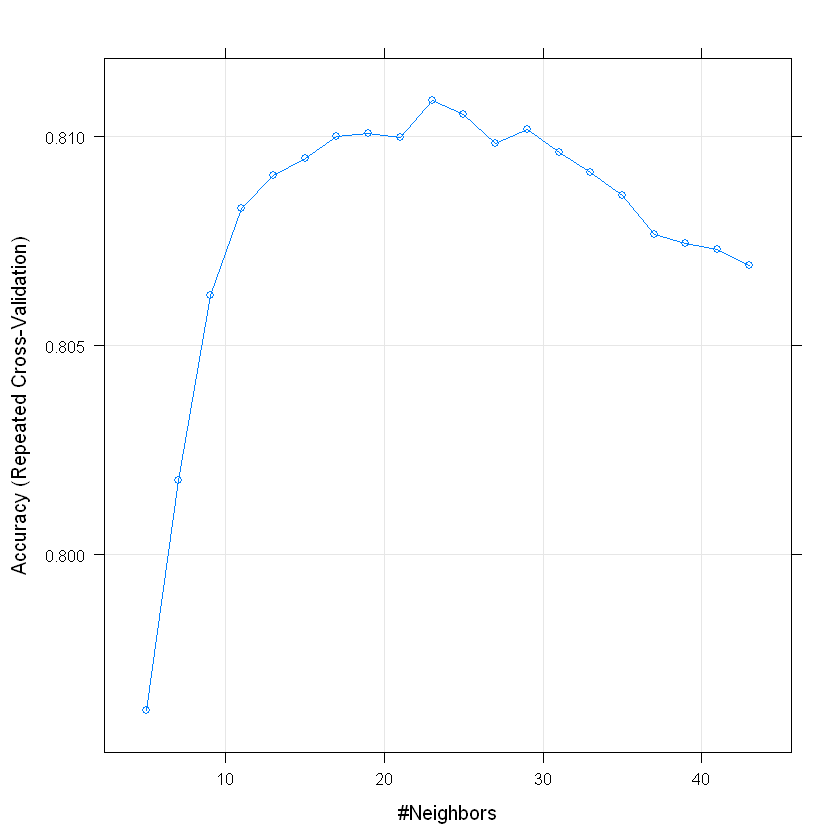

In [73]:
# Número de Vizinhos x Acurácia Modelo1
plot(knn_v1)

In [74]:
# Fazendo previsões
knnPredict1 <- predict(knn_v1, newdata = dados_teste_scaled)


In [75]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict1, dados_teste$DEFAULTING)

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes 5526 1161
       No   235  491
                                          
               Accuracy : 0.8117          
                 95% CI : (0.8026, 0.8205)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 1.796e-13       
                                          
                  Kappa : 0.3205          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9592          
            Specificity : 0.2972          
         Pos Pred Value : 0.8264          
         Neg Pred Value : 0.6763          
             Prevalence : 0.7771          
         Detection Rate : 0.7454          
   Detection Prevalence : 0.9021          
      Balanced Accuracy : 0.6282          
                                          
       'Positive' Class : Yes             
                        

In [76]:
# Definindo valores de y e y_pred
y<- dados_teste$DEFAULTING
y_pred_v1<- knnPredict1

In [77]:
# Calculando Precision
precision_v1<- posPredValue(y_pred_v1,y)
precision_v1

[1] 0.8263795

In [78]:
# Calculando recall
recall_v1<- sensitivity(y_pred_v1,y)
recall_v1

[1] 0.9592085

In [79]:
# Calculando F1-Score
F1_v1<- (2 * precision_v1 * recall_v1) / (precision_v1 + recall_v1)
F1_v1

[1] 0.8878535

### MODELO 2

In [80]:
# Arquivo de controle
ctrl2 <- trainControl(method = "repeatedcv", 
                     repeats = 3, 
                     classProbs = TRUE,
                     summaryFunction = twoClassSummary)



In [81]:
# Treinamento do modelo
knn_v2 <- train(DEFAULTING ~ ., 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl2, 
                metric = "ROC",
                tuneLength = 20)

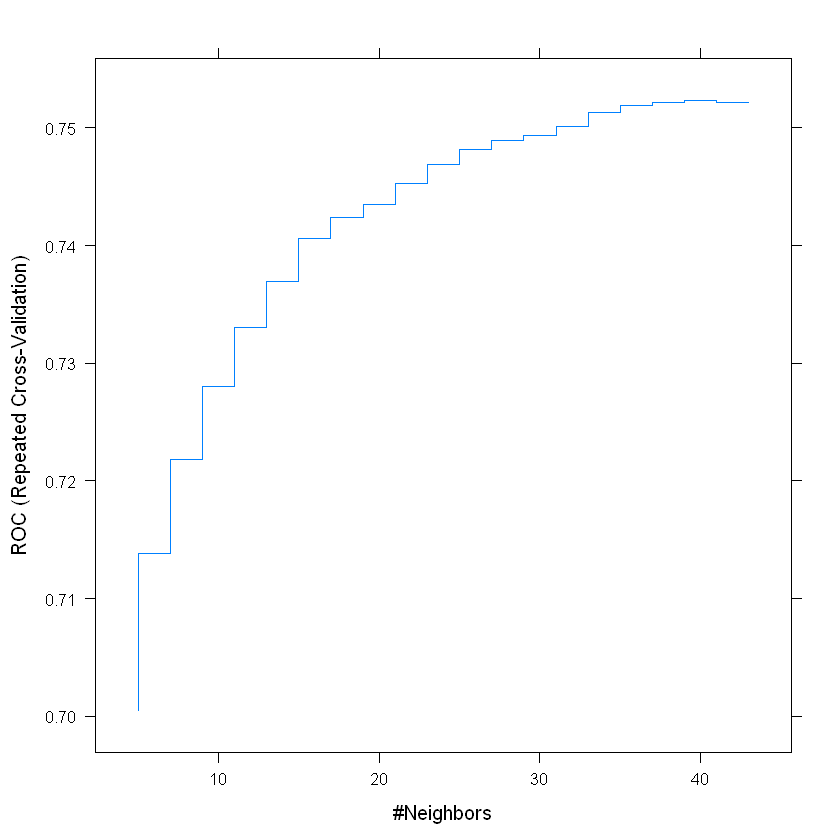

In [82]:
# Número de Vizinhos x Acurácia
plot(knn_v2, print.thres = 0.5, type="S")

In [83]:
# Fazendo previsões
knnPredict2 <- predict(knn_v2, newdata = dados_teste_scaled)


In [84]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict2, dados_teste$DEFAULTING)

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes 5567 1200
       No   194  452
                                          
               Accuracy : 0.812           
                 95% CI : (0.8029, 0.8208)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 1.166e-13       
                                          
                  Kappa : 0.3065          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9663          
            Specificity : 0.2736          
         Pos Pred Value : 0.8227          
         Neg Pred Value : 0.6997          
             Prevalence : 0.7771          
         Detection Rate : 0.7510          
   Detection Prevalence : 0.9129          
      Balanced Accuracy : 0.6200          
                                          
       'Positive' Class : Yes             
                        

In [86]:
# Definindo valores de y e y_pred
y<- dados_teste$DEFAULTING
y_pred_v2<- knnPredict2

In [87]:
# Calculando Precision
precision_v2<- posPredValue(y_pred_v2,y)
precision_v2

[1] 0.8226688

In [88]:
# Calculando recall
recall_v2<- sensitivity(y_pred_v2,y)
recall_v2

[1] 0.9663253

In [89]:
# Calculando F1-Score
F1_v2<- (2 * precision_v2 * recall_v2) / (precision_v2 + recall_v2)
F1_v2

[1] 0.8887292

### MODELO 3

* Iremos realizar o balanceamento, para resolver problema de desequilíbrio de classe (*Defaulting)

In [90]:
# Balanceamento de classe
dados_treino_bal<- SMOTE(DEFAULTING ~.,dados_treino_scaled)

In [91]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

In [92]:
# Criação do modelo
knn_v3 <- train(DEFAULTING ~ ., 
                data = dados_treino_bal, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

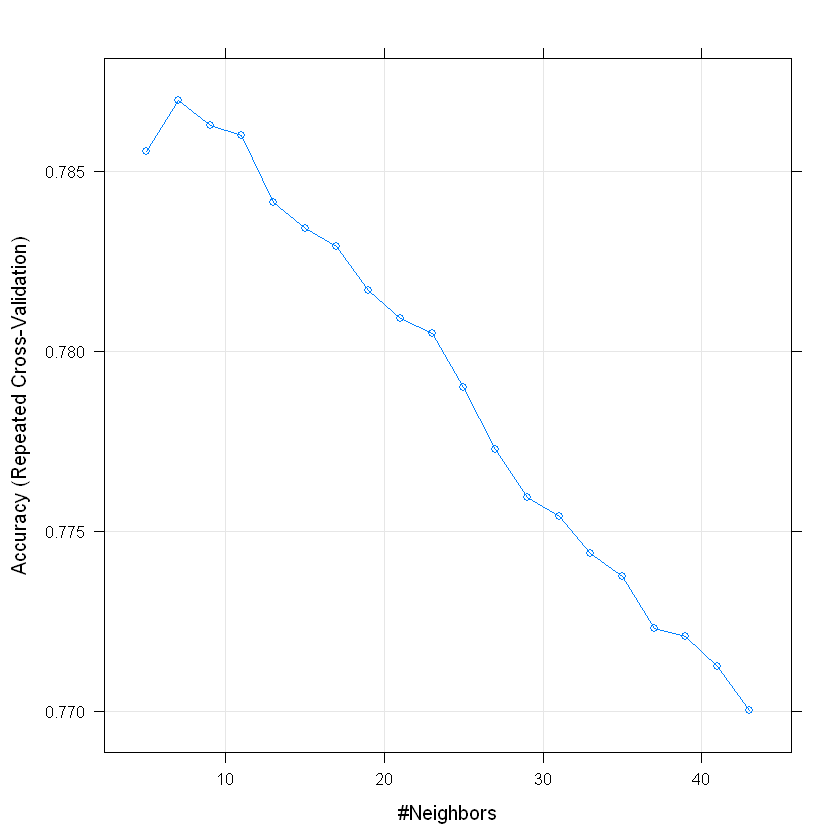

In [93]:
# Número de Vizinhos x Acurácia
plot(knn_v3)

In [96]:
# Fazendo previsões
knnPredict3 <- predict(knn_v3, newdata = dados_teste_scaled)


In [97]:
# Cria a Confusion Matrix
confusionMatrix(knnPredict3, dados_teste$DEFAULTING)

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes 5100  972
       No   661  680
                                          
               Accuracy : 0.7797          
                 95% CI : (0.7701, 0.7891)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 0.3035          
                                          
                  Kappa : 0.3183          
                                          
 Mcnemar's Test P-Value : 1.703e-14       
                                          
            Sensitivity : 0.8853          
            Specificity : 0.4116          
         Pos Pred Value : 0.8399          
         Neg Pred Value : 0.5071          
             Prevalence : 0.7771          
         Detection Rate : 0.6880          
   Detection Prevalence : 0.8191          
      Balanced Accuracy : 0.6484          
                                          
       'Positive' Class : Yes             
                        

In [98]:
# Definindo valores de y e y_pred
y<- dados_teste$DEFAULTING
y_pred_v3<- knnPredict3

In [99]:
# Calculando Precision
precision_v3<- posPredValue(y_pred_v3,y)
precision_v3

[1] 0.8399209

In [100]:
# Calculando recall
recall_v3<- sensitivity(y_pred_v3,y)
recall_v3

[1] 0.885263

In [101]:
# Calculando F1-Score
F1_v3<- (2 * precision_v3 * recall_v3) / (precision_v3 + recall_v3)
F1_v3

[1] 0.8619961

### MODELO 4

* Iremos selecionar as variáveis mais importantes do modelo 3 (dados balanceados)

In [102]:
# Variáveis mais importantes
varImp(knn_v3)

ROC curve variable importance

  only 20 most important variables shown (out of 23)

          Importance
PAY_0        100.000
PAY_2         71.770
LIMIT_BAL     68.901
PAY_3         65.779
PAY_4         60.665
PAY_AMT1      60.578
PAY_AMT2      56.227
PAY_5         55.732
PAY_6         50.737
PAY_AMT3      48.912
PAY_AMT4      42.179
PAY_AMT6      40.165
PAY_AMT5      39.191
SEX           25.262
EDUCATION     21.578
BILL_AMT1     12.702
MARRIAGE      12.391
BILL_AMT2      8.158
AGE            7.608
BILL_AMT3      6.131

In [103]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

In [104]:
# Criação do modelo
knn_v4 <- train(DEFAULTING ~ PAY_0+PAY_2+LIMIT_BAL+PAY_3+PAY_AMT1+PAY_4+PAY_AMT2, 
                data = dados_treino_bal, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

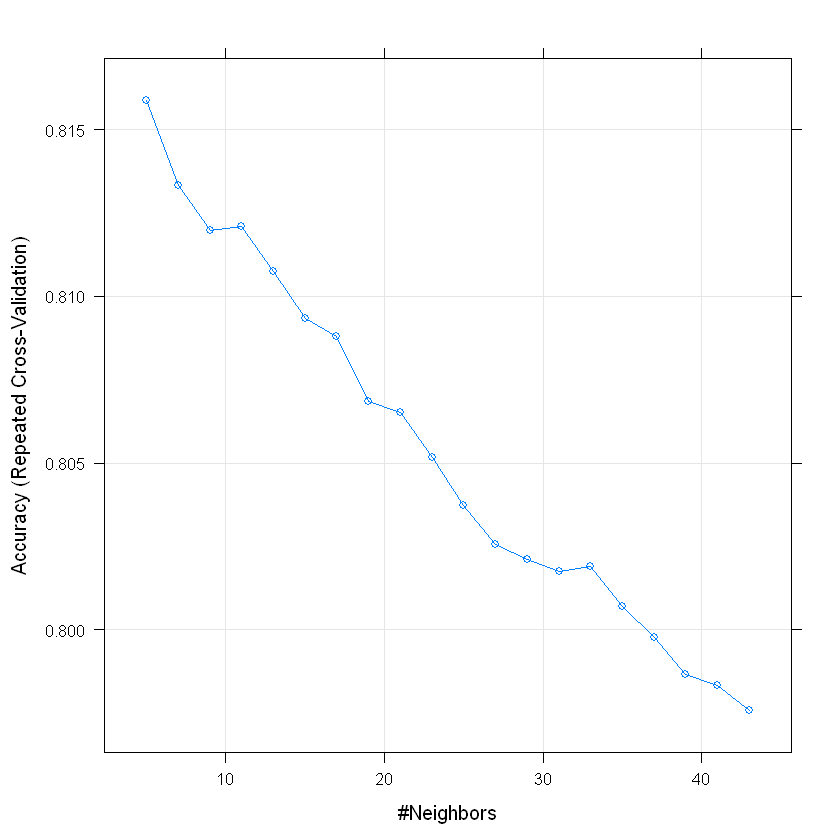

In [105]:
# Número de Vizinhos x Acurácia
plot(knn_v4)

In [107]:
# Fazendo previsões
knnPredict4 <- predict(knn_v4, newdata = dados_teste_scaled)

In [108]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict4, dados_teste$DEFAULTING)

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes 4934  925
       No   827  727
                                          
               Accuracy : 0.7637          
                 95% CI : (0.7538, 0.7733)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : 0.99735         
                                          
                  Kappa : 0.3029          
                                          
 Mcnemar's Test P-Value : 0.02048         
                                          
            Sensitivity : 0.8564          
            Specificity : 0.4401          
         Pos Pred Value : 0.8421          
         Neg Pred Value : 0.4678          
             Prevalence : 0.7771          
         Detection Rate : 0.6656          
   Detection Prevalence : 0.7904          
      Balanced Accuracy : 0.6483          
                                          
       'Positive' Class : Yes             
                        

In [109]:
# Definindo valores de y e y_pred
y<- dados_teste$DEFAULTING
y_pred_v4<- knnPredict4

In [110]:
# Calculando Precision
precision_v4<- posPredValue(y_pred_v4,y)
precision_v4

[1] 0.8421232

In [111]:
# Calculando recall
recall_v4<- sensitivity(y_pred_v4,y)
recall_v4

[1] 0.8564485

In [112]:
# Calculando F1-Score
F1_v4<- (2 * precision_v4 * recall_v4) / (precision_v4 + recall_v4)
F1_v4

[1] 0.8492255

### MODELO 5

* Iremos selecionar as variáveis mais importantes do modelo 1 (sem dados balanceados)

In [113]:
# Variáveis mais importantes
varImp(knn_v1)

ROC curve variable importance

  only 20 most important variables shown (out of 23)

          Importance
PAY_0        100.000
PAY_2         71.847
PAY_3         64.305
LIMIT_BAL     60.561
PAY_AMT1      59.510
PAY_4         57.062
PAY_AMT2      54.599
PAY_5         52.757
PAY_AMT3      50.724
PAY_6         47.578
PAY_AMT4      47.548
PAY_AMT5      43.199
PAY_AMT6      42.731
EDUCATION     15.210
SEX           12.788
MARRIAGE      10.902
BILL_AMT1      9.174
BILL_AMT2      5.648
BILL_AMT3      4.168
AGE            2.877

In [114]:
# Arquivo de controle
ctrl <- trainControl(method = "repeatedcv", repeats = 3) 

In [115]:
# Criação do modelo
knn_v5 <- train(DEFAULTING ~ PAY_0+PAY_2+LIMIT_BAL+PAY_3+PAY_AMT1+PAY_4+PAY_AMT2, 
                data = dados_treino_scaled, 
                method = "knn", 
                trControl = ctrl, 
                tuneLength = 20)

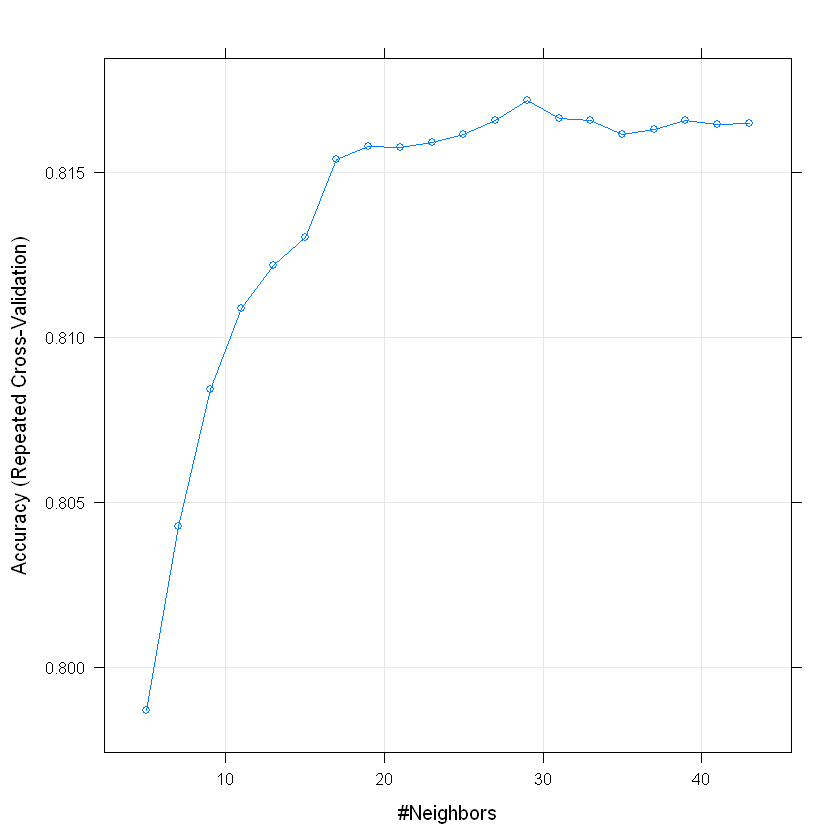

In [148]:
plot(knn_v5)

In [117]:
# Fazendo previsões
knnPredict5 <- predict(knn_v5, newdata = dados_teste_scaled)

In [118]:
# Criando a Confusion Matrix
confusionMatrix(knnPredict5, dados_teste$DEFAULTING)

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes 5481 1086
       No   280  566
                                          
               Accuracy : 0.8157          
                 95% CI : (0.8067, 0.8245)
    No Information Rate : 0.7771          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3559          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9514          
            Specificity : 0.3426          
         Pos Pred Value : 0.8346          
         Neg Pred Value : 0.6690          
             Prevalence : 0.7771          
         Detection Rate : 0.7394          
   Detection Prevalence : 0.8859          
      Balanced Accuracy : 0.6470          
                                          
       'Positive' Class : Yes             
                        

In [119]:
# Definindo valores de y e y_pred
y<- dados_teste$DEFAULTING
y_pred_v5<- knnPredict5

In [120]:
# Calculando Precision
precision_v5<- posPredValue(y_pred_v5,y)
precision_v5

[1] 0.8346277

In [121]:
# Calculando recall
recall_v5<- sensitivity(y_pred_v5,y)
recall_v5

[1] 0.9513973

In [122]:
# Calculando F1-Score
F1_v5<- (2 * precision_v5 * recall_v5) / (precision_v5 + recall_v5)
F1_v5

[1] 0.8891953

**Melhor Modelo**

* O modelo 5 foi o que obteve melhor acurácia (*0.8157*), foi o mais equilibrado na relação entre verdadeiros positivos e verdadeiros negativos, com sensibiliade de *0.9514* e especificidade *0.3426*

## 4. Previsões

In [132]:
# Preparando dados de entrada
PAY_0 = c(2, 2, 0)
PAY_2 = c(1, 0, 0)
LIMIT_BAL = c(50.000, 30.000, 20.000)
PAY_3 = c(-1, 0, -1)
PAY_AMT1 = c(1.518, 2.000, 1.483)
PAY_4 = c(1,0,0)
PAY_AMT2 = c(700,1.000,2.040)

In [135]:
# Dataframe com dados novos
dados_novos<- data.frame(PAY_0,PAY_2,LIMIT_BAL,PAY_3,PAY_AMT1,PAY_4,PAY_AMT2)

In [136]:
# Visualizar os dados
head(dados_novos)

PAY_0,PAY_2,LIMIT_BAL,PAY_3,PAY_AMT1,PAY_4,PAY_AMT2
2,1,50,-1,1.518,1,700.00
2,0,30,0,2.000,0,1.00
0,0,20,-1,1.483,0,2.04


In [137]:
# Transformando as variáveis em factor
dados_novos$PAY_0<- factor(dados_novos$PAY_0)
dados_novos$PAY_2<- factor(dados_novos$PAY_2)
dados_novos$PAY_3<- factor(dados_novos$PAY_3)
dados_novos$PAY_4<- factor(dados_novos$PAY_4)

In [141]:
# Normalizando colunas númerica nos novos dados
dados_novos_scaled<- dados_novos %>%
mutate_if(is.numeric, scale)

In [144]:
# Visualizando os novos dados normalizados
head(dados_novos_scaled)

PAY_0,PAY_2,LIMIT_BAL,PAY_3,PAY_AMT1,PAY_4,PAY_AMT2
2,1,1.0910895,-1,-0.5157191,1,1.1546996
2,0,-0.2182179,0,1.1525804,0,-0.5786393
0,0,-0.8728716,-1,-0.6368612,0,-0.5760603


In [146]:
# Fazendo previsões
knnPredict_final <- predict(knn_v5, newdata = dados_novos_scaled)

character(0)

In [145]:
# Previsões
knnPredict_final

[1] Yes No  Yes
Levels: Yes No